# Data Visiualization
## Homework 1 Question 2

### Name: 賴薇
### Student No.: 60847034s

### Task 1

### 1. Compute the total number of wins for each of the teams in MLB over 2011-2015, sort them in a descending order.

In [1]:
import pandas as pd

df_team = pd.read_csv('teams.csv')
unique_team = pd.unique(df_team['teamID'])
#print(unique_team)

df_team_sum_w = pd.DataFrame(columns=['teamID', 'wins over 2011-2015'])
df_team_gruop_year = df_team[['teamID', 'yearID', 'W']].groupby(by = 'teamID')

for i in range(len(unique_team)):
    team_i = df_team_gruop_year.get_group(str(unique_team[i]))
    
    sumW = -1
    for index, row in team_i.iterrows():
        if row['yearID'] >= 2011 and row['W'] != None:
            if sumW == -1:
                sumW = row['W']
            else:
                sumW += row['W']
    if sumW != -1:
        df_team_sum_w = df_team_sum_w.append({'teamID': unique_team[i], 'wins over 2011-2015': sumW}, ignore_index=True)
    else:
        df_team_sum_w = df_team_sum_w.append({'teamID': unique_team[i], 'wins over 2011-2015': None}, ignore_index=True)
    
df_team_sum_w = df_team_sum_w.sort_values(by = 'wins over 2011-2015', ascending = False)
df_team_sum_w

,teamID,wins over 2011-2015
100,SLN,465
111,NYA,448
124,LAN,446
101,WAS,443
106,DET,440
...,...,...
131,CAL,None
135,MON,None
137,SE1,None
138,ML4,None


### 2. Compute the average payroll per year for all teams over 2011-2015, sort them in a descending order.

In [2]:
df_player = pd.read_csv('players.csv')
#print(df_player)
unique_team2 = pd.unique(df_player['teamID'])
#print(unique_team2)

df_team_avg_payroll = pd.DataFrame(columns=['teamID', 'avg_payroll over 2011-2015'])

df_player_gruop_year = df_player[['teamID', 'yearID', 'salary']].groupby(by = 'teamID')
for i in range(len(unique_team2)):
    team_i = df_player_gruop_year.get_group(str(unique_team2[i]))
    team_i = team_i[team_i.yearID >= 2011]
    team_i = team_i.drop(axis = 1, columns = 'yearID')
    df_team_avg_payroll = df_team_avg_payroll.append({'teamID': unique_team2[i], 'avg_payroll over 2011-2015': team_i['salary'].mean()}, ignore_index=True)

df_team_avg_payroll = df_team_avg_payroll.sort_values(by = 'avg_payroll over 2011-2015', ascending = False)
df_team_avg_payroll

,teamID,avg_payroll over 2011-2015
11,NYA,7.638713e+06
10,PHI,5.721195e+06
50,LAN,5.642426e+06
7,DET,5.513730e+06
25,BOS,5.184631e+06
...,...,...
57,CAL,NaN
60,SE1,NaN
62,MON,NaN
63,ML4,NaN


### 3. Create a visualization of your choice which will all allow you to show whether a team’s winning record is related to its payroll. So is a team’s winning record related to its payroll?

<font color=blue size=4>Answer: Yes. Mostly, the team with high sum of wins has large average payroll.</font>

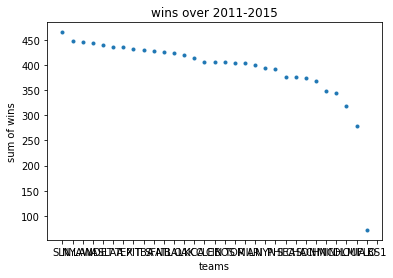

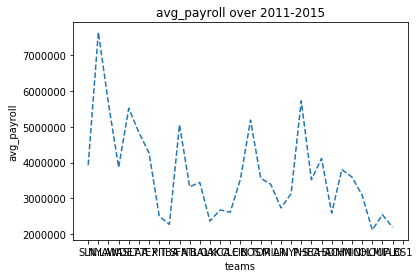

In [8]:
# merge data for comparison
pd_merge_sumW_avgpayroll = pd.merge(df_team_sum_w, df_team_avg_payroll, on = 'teamID', how = 'outer')
#print(pd_merge_sumW_avgpayroll)

import matplotlib.pyplot as plt
plt.figure(1)
plt.title('wins over 2011-2015')
plt.xlabel('teams')
plt.ylabel('sum of wins')
print(plt.plot(pd_merge_sumW_avgpayroll['teamID'], pd_merge_sumW_avgpayroll['wins over 2011-2015'], '.'))

plt.figure(2)
plt.title('avg_payroll over 2011-2015')
plt.xlabel('teams')
plt.ylabel('avg_payroll')
print(plt.plot(pd_merge_sumW_avgpayroll['teamID'], pd_merge_sumW_avgpayroll['avg_payroll over 2011-2015'], '--'))

### Task 2

###  1. Compute the Batting Averages for each of the MLB teams over 2011-2015, sort them in a descending order. The Batting Average is defined as Hits/At Bats. The average is calculated from all players in each team.

In [4]:
df_player_BA = df_player[['teamID', 'yearID', 'H', 'AB']].groupby(by = 'teamID')
df_team_BA = pd.DataFrame(columns=['teamID', 'avg_BA over 2011-2015'])

for i in range(len(unique_team2)):
    team_i = df_player_BA.get_group(str(unique_team2[i]))
    team_i = team_i[team_i.yearID >= 2011]
    #print(team_i)
    sumBA = 0
    count = 0
    for index, row in team_i.iterrows():
        if row['AB'] > 0:
            sumBA += row['H']/row['AB']
            count += 1
    if count > 0:
        df_team_BA = df_team_BA.append({'teamID': unique_team2[i], 'avg_BA over 2011-2015': sumBA/count}, ignore_index=True)
    else:
        df_team_BA = df_team_BA.append({'teamID': unique_team2[i], 'avg_BA over 2011-2015': None}, ignore_index=True)

df_team_BA = df_team_BA.sort_values(by = 'avg_BA over 2011-2015', ascending = False)
df_team_BA

,teamID,avg_BA over 2011-2015
23,CLE,0.221480
64,TEX,0.214438
7,DET,0.213173
54,LAA,0.209346
52,HOU,0.205487
...,...,...
57,CAL,NaN
60,SE1,NaN
62,MON,NaN
63,ML4,NaN


### 2. Create a visualization of your choice which will allow you to decide whether a team’s batting average is related to its win-loss record. So is a team’s winning record related to its batting average?

<font color=blue size=4>Answer: No. Could not see any sign of relation between winning score and batting average.</font>

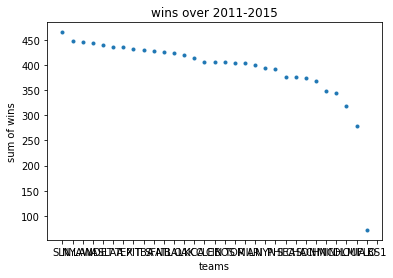

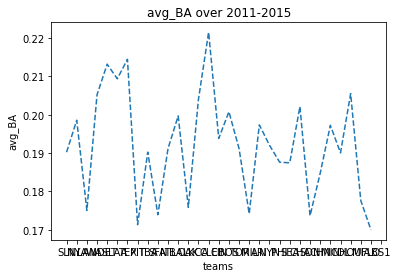

In [5]:
pd_merge_sumW_BA = pd.merge(df_team_sum_w, df_team_BA, on = 'teamID', how = 'outer')
plt.figure(1)
plt.title('wins over 2011-2015')
plt.xlabel('teams')
plt.ylabel('sum of wins')
print(plt.plot(pd_merge_sumW_BA['teamID'], pd_merge_sumW_BA['wins over 2011-2015'], '.'))

plt.figure(2)
plt.title('avg_BA over 2011-2015')
plt.xlabel('teams')
plt.ylabel('avg_BA')
print(plt.plot(pd_merge_sumW_BA['teamID'], pd_merge_sumW_BA['avg_BA over 2011-2015'], '--'))

### Task 3

### 1. Display the average ERA (Earned Run Average) for each of the MLB teams in 2011-2015, sort them in a descending order. A lower ERA indicates a better pitching performance.

In [6]:
df_team_ERA = df_team[['teamID', 'yearID', 'ERA']].groupby(by = 'teamID')
df_team_avgERA = pd.DataFrame(columns=['teamID', 'avg_ERA over 2011-2015'])

for i in range(len(unique_team)):
    team_i = df_team_ERA.get_group(str(unique_team[i]))
    team_i = team_i[team_i.yearID >= 2011]
    df_team_avgERA = df_team_avgERA.append({'teamID': unique_team[i], 'avg_ERA over 2011-2015': team_i['ERA'].mean()},  ignore_index=True)
   
df_team_avgERA = df_team_avgERA.sort_values(by = 'avg_ERA over 2011-2015', ascending = False)
df_team_avgERA

,teamID,avg_ERA over 2011-2015
142,COL,4.794
127,MIN,4.508
129,HOU,4.308
141,TOR,4.202
103,BOS,4.202
...,...,...
131,CAL,NaN
135,MON,NaN
137,SE1,NaN
138,ML4,NaN


### 2. Create a visualization of your choice which will allow you to decide if a team’s win-loss record is related to its pitching performance. So is a team’s winning record related to its pitching performance?

<font color=blue size=4>Answer: Yes. Since the total number of sum gets higher, the average ERA gets lower which indicates better performance.</font>

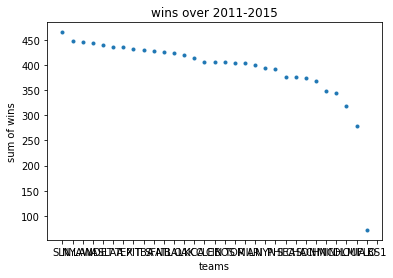

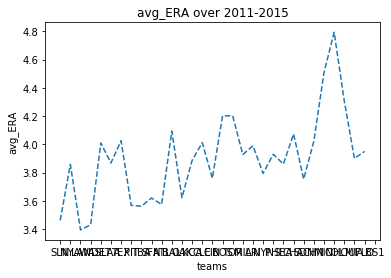

In [7]:
pd_merge_sumW_avgERA = pd.merge(df_team_sum_w, df_team_avgERA, on = 'teamID', how = 'outer')
plt.figure(1)
plt.title('wins over 2011-2015')
plt.xlabel('teams')
plt.ylabel('sum of wins')
print(plt.plot(pd_merge_sumW_avgERA['teamID'], pd_merge_sumW_avgERA['wins over 2011-2015'], '.'))

plt.figure(2)
plt.title('avg_ERA over 2011-2015')
plt.xlabel('teams')
plt.ylabel('avg_ERA')
print(plt.plot(pd_merge_sumW_avgERA['teamID'], pd_merge_sumW_avgERA['avg_ERA over 2011-2015'], '--'))